In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

In [2]:
import warnings 
warnings.filterwarnings("ignore") 

In [3]:
train_data = pd.read_csv('Santander_train.csv')
test_data = pd.read_csv('Santander_test.csv') 

In [4]:
train_data.shape , test_data.shape

((76020, 371), (75818, 370))

In [5]:
train_data.head(3) 

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [6]:
test_data.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95


#### Happy Customers have target 0 
#### Unhappy Customers have target 1

In [8]:
df = pd.DataFrame(train_data.TARGET.value_counts())
df.head()

,TARGET
0,73012
1,3008


In [11]:
df['Percentage'] = 100*df['TARGET']/train_data.shape[0] 
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


## Let's see the info about each of the columns and Description of the given data

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [14]:
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


# 1) Var3 

This is suspected to be the nationality of customers . Let's explore this dataset 

In [18]:
train_data.var3.value_counts()[:15]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
 6            82
 0            75
 10           72
 11           66
 5            63
Name: var3, dtype: int64

In [19]:
test_data.var3.value_counts()[:15]

 2         73962
-999999      120
 8           116
 9           108
 3           107
 13          107
 1            99
 10           85
 11           85
 12           83
 0            76
 14           74
 7            73
 5            71
 6            70
Name: var3, dtype: int64

What we see here is the top 15 nationality (I should not say this ) rather top 15 Var3 values . Assuming that -999999 means unknown value of var3 , so I have following options to do  - <br>  
1) Either we can replace that -999999 with the most occuring value i.e 2 because the probability of that most of the unkonwn values having actual value as 2 is high <br> 
2) Uniformly Distribute all the values from this column into -999999 (Like if 90% of total is 2 , so in -999999 also 90% of the value will be 2) <br>
3) The most difficult one(atleast in this scenario) is to train this column to find the value of var3 [Will probably do this] 

In [21]:
train_data['Zero'] = (train_data == 0).sum(axis = 1) 
train_data['Zero']

0        356
1        330
2        341
3        310
4        320
        ... 
76015    356
76016    325
76017    342
76018    341
76019    356
Name: Zero, Length: 76020, dtype: int64

So a very important feature we've discovered here is that although the number of features are very big ,i.e, 370 features are there [as the 371st feature is the target feature] ,  but the number of non-zero features are very less for each row . We don't need to eliminate this as this thing may be of help . Anyways if that column is consistently zero , so it will be automatically removed from our data during feature selection process 

In [22]:
train_data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,Zero
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0,356
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0,330
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0,341
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0,310
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,320


#   2) num_var4 

This is suspected to be the number of bank products . Let's analyse this column of rather say the feature of dataset 

In [24]:
train_data.num_var4.value_counts()[:15]

1    38147
0    19528
2    12692
3     4377
4     1031
5      203
6       36
7        6
Name: num_var4, dtype: int64

So we see that there are only 8 distinct values of num_var4 . Let's analyse if any null values are present or not 


In [26]:
train_data[train_data.num_var4.isnull() == True ]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,Zero


In [27]:
# So not a single entry in num_var4 is non-zero 

Let's see the same information in a histogram 

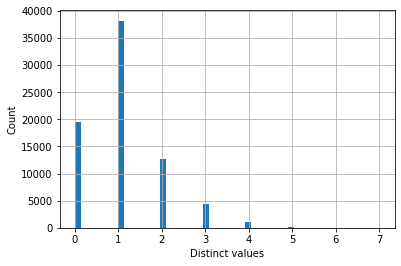

In [31]:
train_data.num_var4.hist(bins = 50) 
plt.xlabel("Distinct values")
plt.ylabel("Count")
plt.show()

In [49]:
data_num_var4 = pd.DataFrame(train_data.num_var4.value_counts()) 

data_num_var4.columns = ['Counts']
data_num_var4['Var'] = data_num_var4.index
data_num_var4.head(5)


,Counts,Var
1,38147,1
0,19528,0
2,12692,2
3,4377,3
4,1031,4


#### Let's see the demsity of happy and unhappy customers in per num_var4 value 

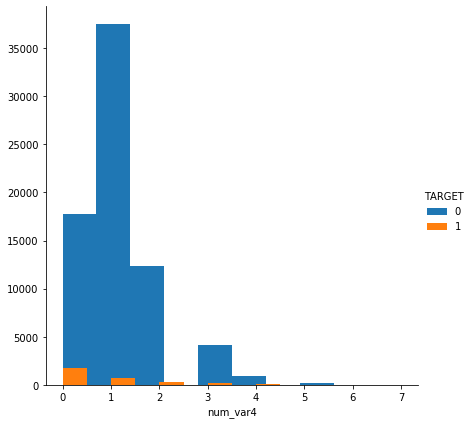

In [51]:
sns.FacetGrid(train_data,hue = 'TARGET' ,size =6).map(plt.hist , "num_var4").add_legend()
plt.show()

So some of the analyis we get from this 2 plotting is -> <br>
1) Most of the customers have num_var4 value as 1 
2) Most of the unhappy customers have less value of num_var4 <br><br>

The logic for point 2 may be is that more population is inclined towards less product that's why more unhappy customers are there 

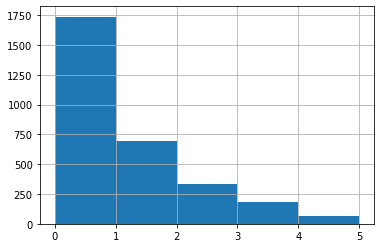

In [54]:
train_data[train_data.TARGET == 1].num_var4.hist(bins = 5)

# 3) Var38 


What this feature represents is still unknown . Some are saying that this is mortage value of bank <br>
Some are saying that this is the customer value  . <br>
Anyways Let's explore this dataset

In [55]:
train_data.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

In [56]:
#Describing the same thing again but just for unhappy customers 

train_data[train_data.TARGET == 1].var38.describe()

count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

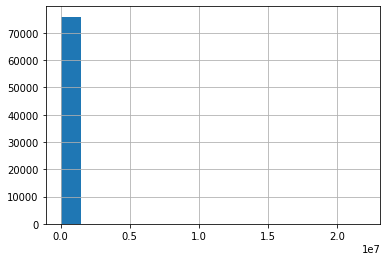

In [58]:
train_data.var38.hist(bins = 15)

As we are not getting a clear picture from this histogram , so let's build it's histogram in logarithm scale 

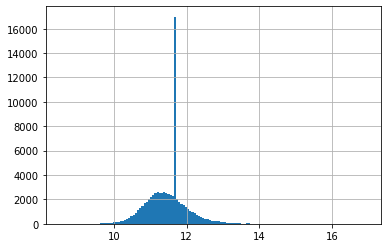

In [62]:
train_data.var38.map(np.log).hist(bins = 140)

We see that a spike is found somewhere near 11.5 to 12  . Let's find the exact value  

In [64]:
train_data.var38.map(np.log).mode()

0    11.672584
dtype: float64

In [65]:
var38_data = pd.DataFrame(train_data.var38.value_counts())

In [68]:
var38_data.head(15)

,var38
117310.979016,14868
451931.220000,16
463625.160000,12
288997.440000,11
104563.800000,11
236690.340000,8
329603.970000,7
104644.410000,7
67088.310000,7
125722.440000,7


While exploring the data , an excellent idea which I got from https://www.kaggle.com/cast42/exploring-features is that since there a a big shift in var38 count when var38 is it's mode value , so what we can do is that we can split the feature var38 into 2 parts var38a and var38b , where -> <br>
1) var38a will contains the most common value i.e whether mode value is present or not  <br>
2) var38b will contains the rest of the value 

# Ye uppar wala task karna bacha hai 

#  4) Var15 

According to some this is the age of the customer 

In [75]:
train_data['var15'].describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

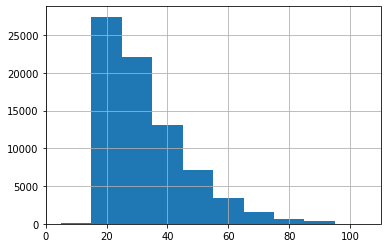

In [76]:
train_data.var15.hist()

Now let's explore the density/ percentage of happy and unhappy customer wrt to this var15 feature 

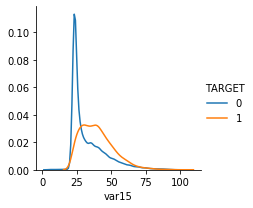

In [77]:
sns.FacetGrid(train_data ,hue = 'TARGET' ,).map(sns.kdeplot , "var15").add_legend()


So from the above plot we find that unhappy customers have slightly higher values than happy customers 

#  5) seldo_var30

In [79]:
train_data['log_saldo_var30'] = train_data['saldo_var30'].map(np.log)


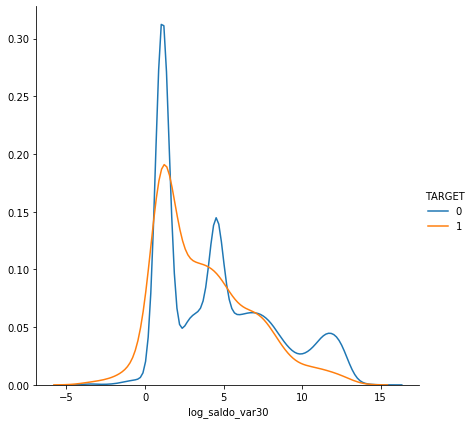

In [80]:
sns.FacetGrid(train_data, hue="TARGET", size=6) \
   .map(sns.kdeplot, "log_saldo_var30") \
   .add_legend();

# Var36  

In [81]:
train_data.var36.describe()

count    76020.000000
mean        40.449079
std         47.362719
min          0.000000
25%          2.000000
50%          3.000000
75%         99.000000
max         99.000000
Name: var36, dtype: float64

In [82]:
data_var36 = pd.DataFrame(train_data.var36.value_counts())

In [83]:
data_var36.shape

(5, 1)

In [84]:
data_var36

,var36
99,30064
3,22177
1,14664
2,8704
0,411


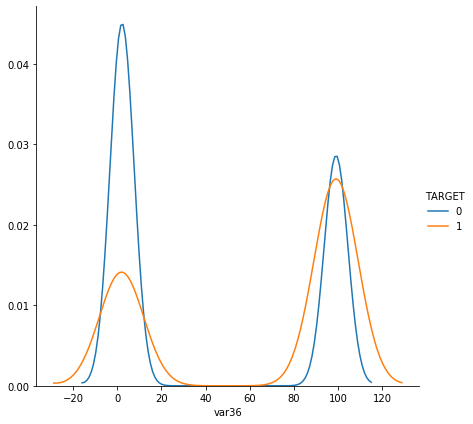

In [85]:
sns.FacetGrid(train_data, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var36") \
   .add_legend()

We find that number of unhappy customers are less when value of Var3 is  0 ,1,2,3 

#  6) num_var5

In [86]:
train_data.num_var5.describe()

count    76020.000000
mean         1.999171
std          1.431902
min          0.000000
25%          0.000000
50%          3.000000
75%          3.000000
max         15.000000
Name: num_var5, dtype: float64

In [87]:
train_data.num_var5.value_counts()

3     50265
0     25561
6       190
9         3
15        1
Name: num_var5, dtype: int64

In [88]:
train_data[train_data.TARGET==1].num_var5.value_counts()

0    1959
3    1042
6       7
Name: num_var5, dtype: int64

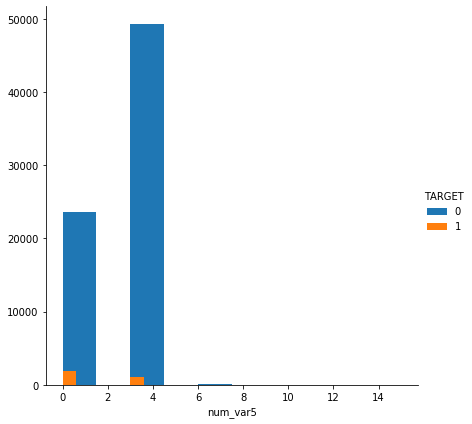

In [89]:
sns.FacetGrid(train_data, hue="TARGET", size=6) \
   .map(plt.hist, "num_var5") \
   .add_legend();

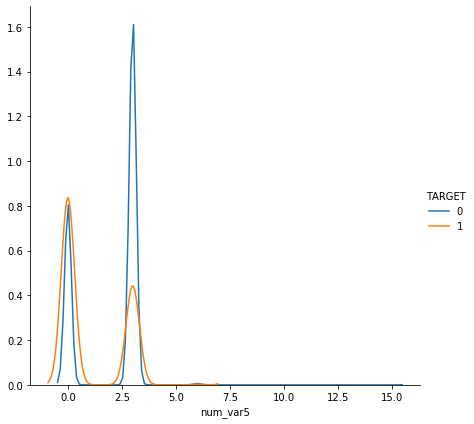

In [90]:
sns.FacetGrid(train_data, hue="TARGET", size=6) \
   .map(sns.kdeplot, "num_var5") \
   .add_legend();